# Laboratorio 8 Deep Learning:
## Integrantes
* Gabriel Vicente 20498
* Alejandro Gomez 20347
# Instrucciones:
● Deben unirse a uno de los grupos de Canvas de nombre “Laboratorio 8 #”, donde N es un número entre 1 y 23. Los grupos pueden ser de 2 o 3 personas. </br>
● Esta actividad debe realizarse en grupos.</br>
● Sólo es necesario que una persona del grupo suba el trabajo a Canvas.</br>
● No se permitirá ni se aceptará cualquier indicio de copia. De presentarse, se procederá según el reglamento correspondiente.</br></br>
# Task 1 - Práctica
Usando la versión 5 de YOLO (la que es compatible con PyTorch), descargue dicho modelo y pruebe cómo funciona con varias imágenes que le parezcan interesantes (deben ser fotografías de objetos reales). Con esto


Using cache found in C:\Users\charl/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-8 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


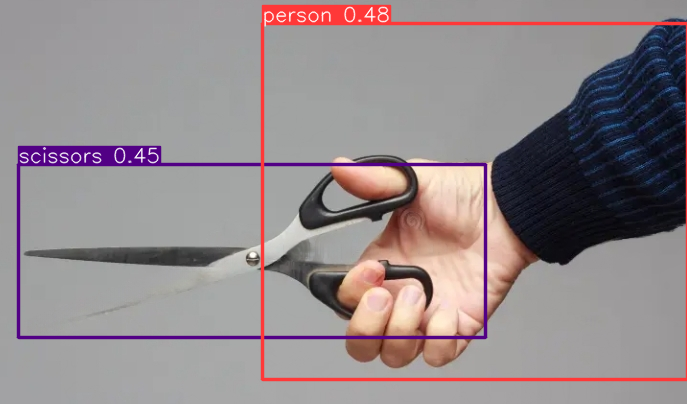

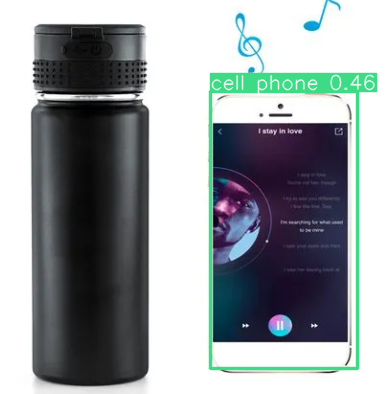

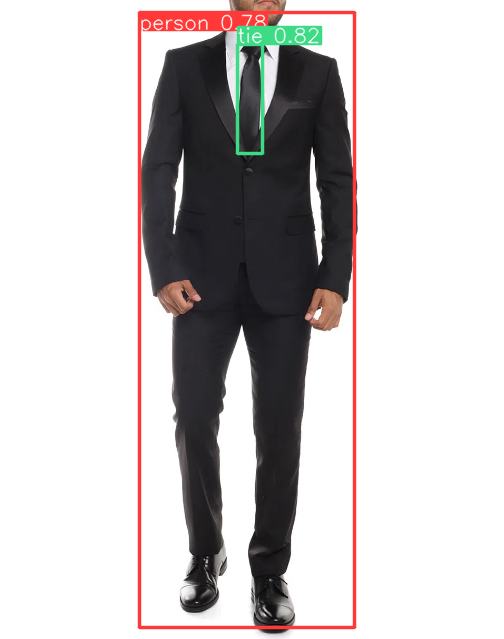

In [12]:
import os
import cv2
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
ruta_imagenes = r'C:\Users\charl\Desktop\S22023\DeepLearning\Laboratorio 8\Imagenes\\'
archivos_imagenes = os.listdir(ruta_imagenes)

for archivo in archivos_imagenes:    
    ruta_completa = ruta_imagenes  + archivo
    results = model(ruta_completa)
    results.show()

1. Grabe un video de no más de 1 minuto donde se muestre su cámara y diferentes objetos, observe como cambian los scores con respecto de diferentes objetos mostrados (muestre al menos 5 objetos diferentes como pachon, celular, lapiz, computadora, teclado, etc)</br>

In [ ]:


camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()

    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(image)

    annotated_frame = results.render()[0]

    cv2.imshow('YOLOv5 Object Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\charl/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-8 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Luego responda las siguientes preguntas</br></br>
a. ¿Encontró algún caso donde el modelo pareciera no tener un score aceptable? (Un score aceptable queda
sujeto a su criterio) ¿Por qué cree que el score fue ese?</br>


En el video se puede apreciar que en muchas ocasiones resultaba con scores "bajos" para objetos con los cuales si se podia realizar una diferencia notoria. Aunque se puede argumentar, que para los objetos presentados en el video la identificación resulto adecuada. Esto se pudo deber a la calidad de la cámara o que la luz pudo haber sido un factor en juego.

b. Investigue qué mejoras se han hecho en cada versión de YOLO, y con esto responda ¿qué cree que podría
hacerse para mejorarlo?</br>

Se podria utilizar la versión más reciente de YOLO (versión 8), ya que en este modelo se incorporaron mejoras cómo el entrenamiento personalizado, uso de datasets y reconocimientos personalizados.

i. Consideren los avances que han habido hasta el momento (versión 7), vean qué ha cambiado y
qué podría mejorar todavía</br>

Se puede mejorar la velocidad de reconocimiento, 

c. Escriba detalladamente cómo podría usar YOLO para poder realizar detección de objetos sobre un dataset
propio, es decir, sobre algun problema totalmente nuevo para YOLO, por ejemplo, detección de puentes con
imagenes satelitales.</br>

Si bien existen otras inteligencias artificiales diseñadas para este problema en especifico, YOLO puede abordar el problema de ruptura de CAPTCHAS. Debido a su volatil reconocimiento, rapida correción y adaptable contexto. Implicando siempre una posible respuesta y de ser aceptada o rechazada, el modelo aprendera y de esta forma ira mejorando gradualmente.

i. Asegúrese de detallar cada paso que debería tomar

Siguiendo pasos generales, se podria optar por un dataset completo de imagenes CAPTCHA, existen varios servicios en internet que dan este servicio gratuito y se puede tener la opcion de tener el dataset completo de manera local, o entrenar el modelo mediante llamadas al servidor que tengan como respuesta un captcha y su respuesta.

Luego, pasar la imagen al modelo de YOLO, que yolo en la imagen identifique las letras, compararlo con el resultado correcto y dependiendo de la respuesta, ajustar el modelo y no realizar cambios

# Task 2 - Teoría
Responda claramente y con una extensión adecuada las siguientes preguntas:
1. Defina en sus propias palabras qué es una caja de anclaje (anchor box). Asegúrese de mencionar cual es
su importancia en la detección de objetos hecha por YOLO y cuál es la diferencia y relación con las cajas
delimitadoras (bounding boxes)

* Es una caja delimitadora predefinida con forma y tamaño específicos que se utiliza como referencia en la detección de objetos, como YOLO. Son cruciales porque permiten capturar objetos de diversas formas y tamaños en una sola pasada de detección. Esto se logra utilizando múltiples cajas de anclaje diseñadas para adaptarse a la variabilidad de objetos en una imagen. Las cajas de anclaje se superponen en la imagen, y cuando se detecta un objeto, se ajusta una caja delimitadora alrededor de él para localizarlo con precisión. En resumen, las cajas de anclaje son fundamentales para la detección eficiente y precisa de objetos en imágenes.

2. Considere leer el paper original de YOLO (You Only Look Once: Unified, Real-Time Object Detection) y luego responda

a. ¿Cuál es la innovación clave que distingue a YOLO de los enfoques tradicionales de detección de
objetos y cómo contribuye a la detección de objetos en tiempo real?

* La innovación clave de YOLO (You Only Look Once) es su enfoque de una sola pasada. A diferencia de los métodos tradicionales que dividen la imagen en regiones y evalúan múltiples veces, YOLO predice objetos en una sola pasada, logrando la detección en tiempo real al aprovechar la eficiencia de la red neuronal convolucional.

b. ¿Cómo maneja YOLO la detección de múltiples objetos dentro de una sola imagen y cuáles son las
ventajas de este enfoque sobre los métodos tradicionales?

* Maneja la detección de múltiples objetos asignando cajas delimitadoras a través de cajas de anclaje predefinidas y prediciendo las clases de objetos simultáneamente. Esto es más eficiente que los métodos tradicionales, ya que evita la duplicación de esfuerzos en la evaluación de regiones y permite una detección más rápida y precisa.

c. ¿Cuáles son las limitaciones o desafíos asociados con YOLO y cuáles son las áreas potenciales de
mejora o investigación adicional en el campo de la detección de objetos en tiempo real?

* Las áreas de mejora incluyen la optimización para objetos pequeños, la detección de objetos en movimiento rápido y la reducción de falsos positivos.
